## Classification Using Logistic Regression in Sklearn



In [3]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /anaconda3/lib/python3.7/site-packages (0.20.3)


In [1]:
import sklearn
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(sklearn.__version__)

0.20.3


### Load and Explore Data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [32]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [33]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [34]:
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

cancer_df['class'] = cancer.target

In [45]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [35]:
cancer_df.shape

(569, 31)

In [36]:
cancer_df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
67,11.31,19.04,71.80,394.1,0.08139,0.04701,0.037090,0.022300,0.1516,0.05667,...,23.84,78.00,466.7,0.12900,0.09148,0.14440,0.06961,0.2400,0.06641,1
443,10.57,18.32,66.82,340.9,0.08142,0.04462,0.019930,0.011110,0.2372,0.05768,...,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736,1
522,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.11080,0.07723,0.02533,0.02832,0.2557,0.07613,1
252,19.73,19.82,130.70,1206.0,0.10620,0.18490,0.241700,0.097400,0.1733,0.06697,...,25.59,159.80,1933.0,0.17100,0.59550,0.84890,0.25070,0.2749,0.12970,0
315,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,19.71,84.48,544.2,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174,1


In [37]:
cancer_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

Text(0, 0.5, 'mean radius')

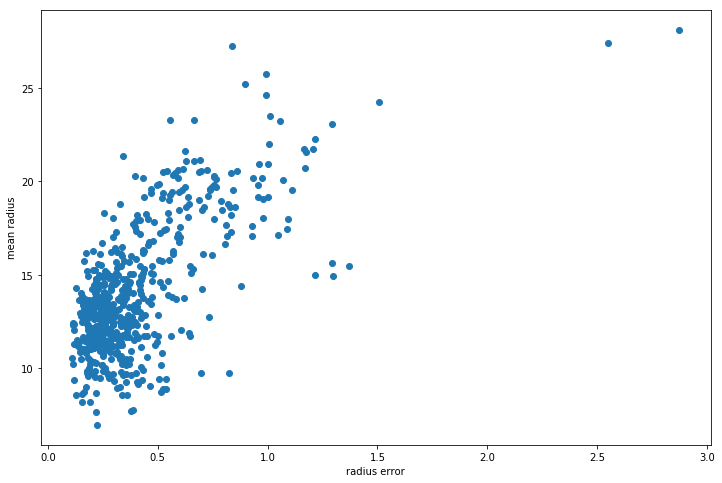

In [38]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(cancer_df['radius error'], cancer_df['mean radius'])

plt.xlabel('radius error')
plt.ylabel('mean radius')

Text(0, 0.5, 'worst fractal dimension')

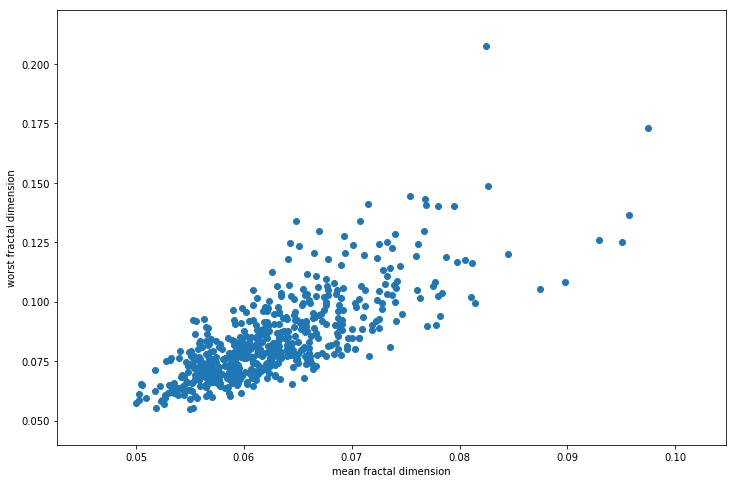

In [39]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(cancer_df['mean fractal dimension'], cancer_df['worst fractal dimension'])

plt.xlabel('mean fractal dimension')
plt.ylabel('worst fractal dimension')

Text(0, 0.5, 'class')

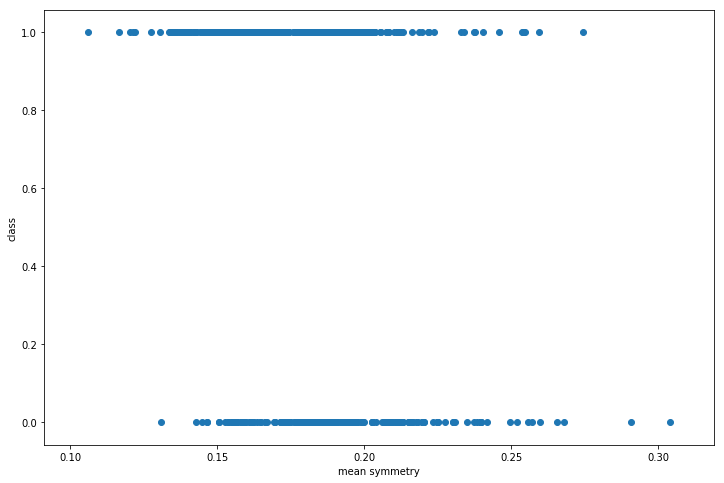

In [40]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(cancer_df['mean symmetry'], cancer_df['class'])

plt.xlabel('mean symmetry')
plt.ylabel('class')

Text(0, 0.5, 'class')

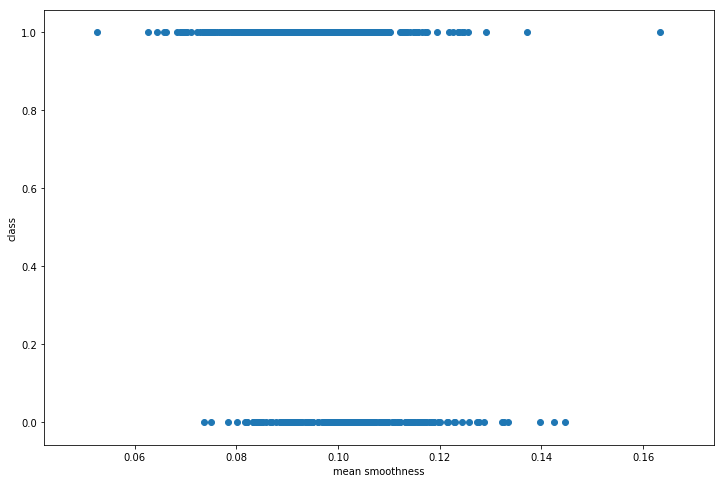

In [41]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(cancer_df['mean smoothness'], cancer_df['class'])

plt.xlabel('mean smoothness')
plt.ylabel('class')

In [56]:
cancer_df_subset = cancer_df[['mean radius', 
                              'mean texture', 
                              'mean perimeter', 
                              'mean area', 
                              'radius error', 
                              'texture error',
                              'worst perimeter',
                              'worst area',
                              'class']]

In [57]:
cancer_corr = cancer_df_subset.corr()

cancer_corr

,mean radius,mean texture,mean perimeter,mean area,radius error,texture error,worst perimeter,worst area,class
mean radius,1.000000,0.323782,0.997855,0.987357,0.679090,-0.097317,0.965137,0.941082,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,0.275869,0.386358,0.358040,0.343546,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.691765,-0.086761,0.970387,0.941550,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.732562,-0.066280,0.959120,0.959213,-0.708984
radius error,0.679090,0.275869,0.691765,0.732562,1.000000,0.213247,0.719684,0.751548,-0.567134
texture error,-0.097317,0.386358,-0.086761,-0.066280,0.213247,1.000000,-0.102242,-0.083195,0.008303
worst perimeter,0.965137,0.358040,0.970387,0.959120,0.719684,-0.102242,1.000000,0.977578,-0.782914
worst area,0.941082,0.343546,0.941550,0.959213,0.751548,-0.083195,0.977578,1.000000,-0.733825
class,-0.730029,-0.415185,-0.742636,-0.708984,-0.567134,0.008303,-0.782914,-0.733825,1.000000


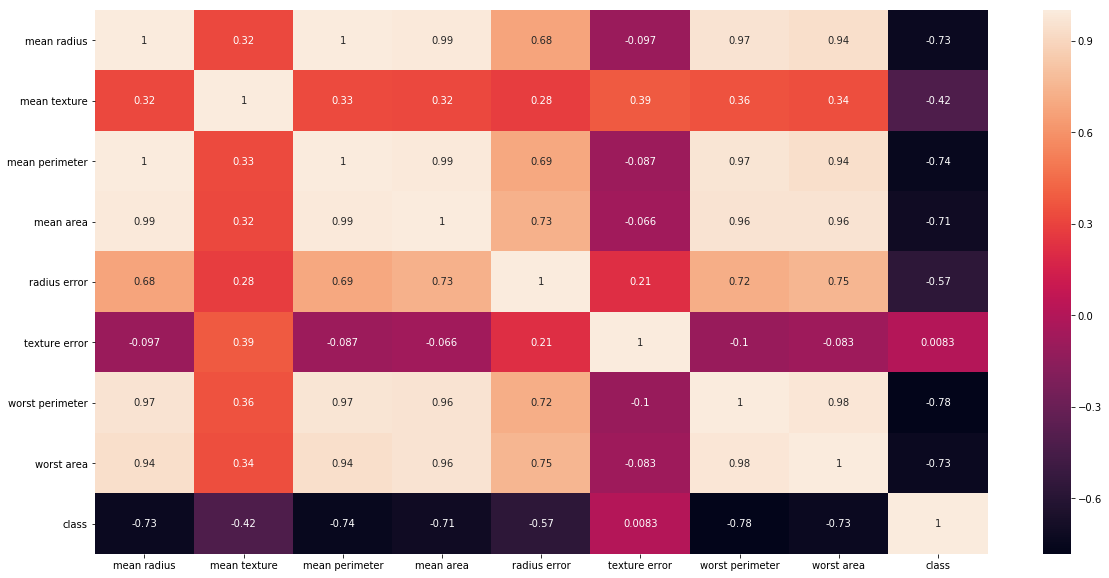

In [58]:
fig, ax = plt.subplots(figsize = (20, 10))

sns.heatmap(cancer_corr, annot = True)

In [60]:
from sklearn.model_selection import train_test_split

X = cancer_df.drop('class', axis = 1)
Y = cancer_df['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [61]:
print("train x shape,",x_train.shape)
print("train y shape,",y_train.shape)

train x shape, (455, 30)
train y shape, (455,)


In [62]:
print("test x shape, ", x_test.shape)
print("test y shape, ", y_test.shape)

test x shape,  (114, 30)
test y shape,  (114,)


### Apply Logistic Regression

* This class implements regularized logistic regression. It can handle both dense and sparse input. 

* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss

* random_state : The seed of the pseudo random number generator to use when shuffling the data. If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random

* penalty : Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties whereas ‘liblinear’ and ‘saga’ handle L1 penalty.

* C : Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

* solver : Algorithm to use in the optimization problem.

    * For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
    * For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
    
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [63]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='liblinear')

In [64]:
classifier.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Test Model

In [66]:
y_pred = classifier.predict(x_test)

In [67]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [68]:
pred_results.head()

,y_test,y_pred
324,1,1
59,1,1
88,1,1
547,1,1
335,0,0


In [69]:
cancer_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

cancer_crosstab

y_test,0,1
y_pred,,
0,38,5
1,3,68


### Precision-recall scores

When we use these for multiclass classification we need to specify an averaging method to determine how the precision and recall scores for different labels should be weighted

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [71]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.9298245614035088
precision_score :  0.9577464788732394
recall_score :  0.9315068493150684
